# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Tatiana 

Apellidos: López Buendía

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [52]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

# Análisis descriptivos


In [2]:
data = pd.read_csv("housing_time_series_by_madrid_neighbourhood.csv")

In [3]:
data.describe()

,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
count,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000
mean,12.884472,0.166231,1.914022,827.942290,124.464833,7.589035,102.360413,148.970967,414.588819,164.314739,1.889709,78.683950,26.623084,96.818305,0.407124,0.616321
std,2.888559,0.666500,2.713414,23.770617,412.596548,18.549503,58.535410,60.178316,1513.534338,87.886635,0.904405,213.730695,60.076064,350.536951,1.732619,3.594493
min,7.400000,-1.900000,-1.500000,795.000000,1.000000,1.000000,17.000000,0.000000,1.000000,16.000000,0.130000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.900000,-0.100000,0.000000,807.000000,6.000000,2.811542,73.000000,116.342466,14.000000,108.456967,1.330096,5.000000,2.000000,3.000000,0.000000,0.000000
50%,12.400000,0.200000,1.300000,827.000000,24.000000,4.219807,94.500000,146.699311,69.500000,141.351449,1.742725,20.000000,9.000000,13.000000,0.000000,0.000000
75%,14.900000,0.500000,2.900000,842.000000,78.000000,6.684170,123.567174,172.385894,224.750000,192.506818,2.327988,63.000000,27.000000,50.000000,0.000000,0.000000
max,22.500000,3.000000,10.700000,872.000000,4438.000000,390.000000,1099.000000,364.000000,18161.000000,618.500000,6.528182,2138.000000,703.000000,3673.000000,20.000000,61.000000


In [4]:
data.columns

Index(['neighbourhood_group', 'date', 'm2_price', 'inflation', 'HICP',
       'population_density', 'listings_count', 'minimum_nights', 'nigth_price',
       'availability_365', 'listing_reviews', 'number_of_reviews',
       'reviews_per_month', 'hosts_count', 'Private_room', 'Entire_home',
       'Hotel_room', 'Shared_room'],
      dtype='object')

In [5]:
data.head()

,neighbourhood_group,date,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
0,Centro,2010-08-01,15.3,0.3,1.6,796,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
1,Centro,2011-01-01,15.6,-0.7,3.0,800,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
2,Centro,2011-02-01,15.4,0.1,3.4,800,4,7.0,184.000000,44.25,4,100.0,0.5925,3,0,4,0,0
3,Centro,2011-05-01,15.0,0.0,3.4,800,5,9.6,61.000000,134.60,11,264.4,1.6120,4,1,4,0,0
4,Centro,2011-06-01,15.0,-0.1,3.0,800,5,5.4,135.333333,129.20,15,289.8,1.7680,4,1,4,0,0


In [6]:
print(data.isnull().sum())

neighbourhood_group    0
date                   0
m2_price               0
inflation              0
HICP                   0
population_density     0
listings_count         0
minimum_nights         0
nigth_price            0
availability_365       0
listing_reviews        0
number_of_reviews      0
reviews_per_month      0
hosts_count            0
Private_room           0
Entire_home            0
Hotel_room             0
Shared_room            0
dtype: int64


No hay NaNs

In [13]:
# Convertimos date a formato datetime format
data['date'] = pd.to_datetime(data['date'])

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)

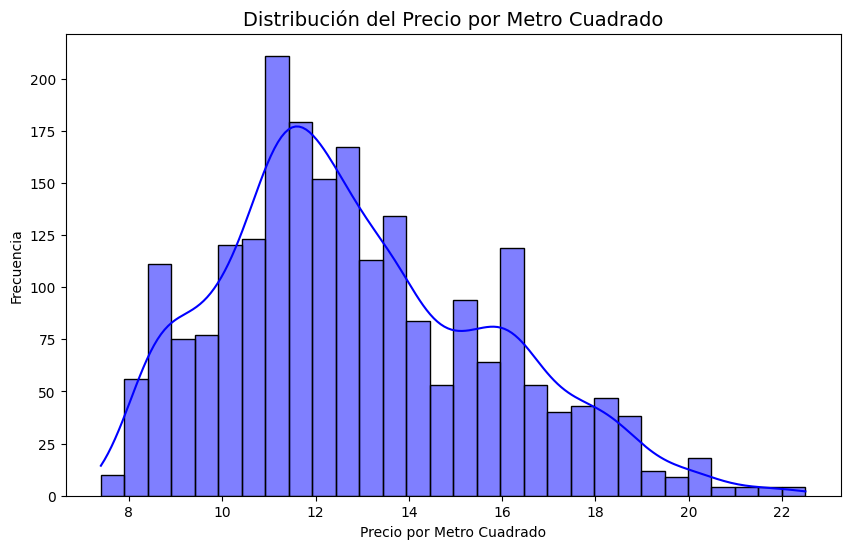

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['m2_price'], bins=30, kde=True, color="blue")
plt.title('Distribución del Precio por Metro Cuadrado', fontsize=14)
plt.xlabel('Precio por Metro Cuadrado')
plt.ylabel('Frecuencia')
plt.show()

Vemos que los valores más frecuentes del precio por metro cuadrado están entre 10 y 14.


C:\Users\tatia\AppData\Local\Temp\ipykernel_8420\1227374087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x='m2_price', y='neighbourhood_group', palette="tab20")


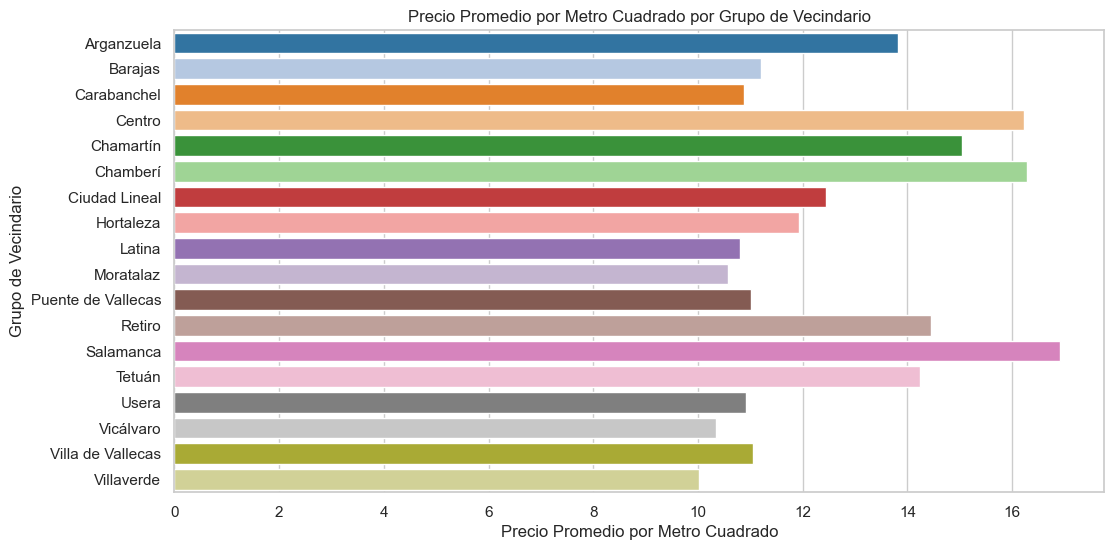

In [24]:
# Precio medio por grupo de vecindario o distrito
avg_price = data.groupby("neighbourhood_group")['m2_price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x='m2_price', y='neighbourhood_group', palette="tab20")
plt.title('Precio Promedio por Metro Cuadrado por Grupo de Vecindario')
plt.xlabel('Precio Promedio por Metro Cuadrado')
plt.ylabel('Grupo de Vecindario')
plt.show()

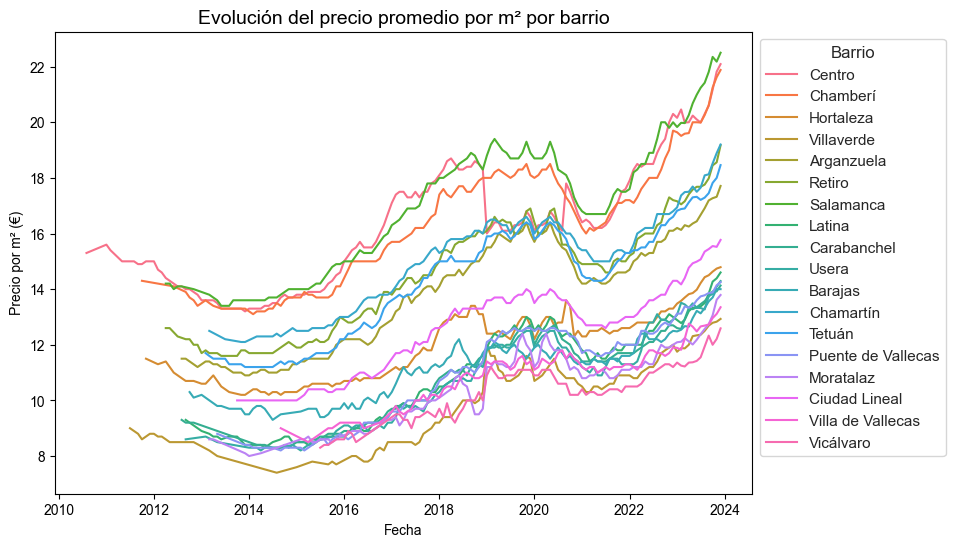

In [16]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=data, x="date", y="m2_price", hue="neighbourhood_group")
plt.title("Evolución del precio promedio por m² por barrio", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Precio por m² (€)")
plt.legend(title="Barrio", bbox_to_anchor=(1, 1))
plt.show()

La gráfica resalta las desigualdades en el mercado inmobiliario de Madrid y la influencia de la ubicación en el valor de las propiedades. Vecindarios céntricos y prestigiosos muestran precios más altos y un crecimiento más pronunciado en comparación con áreas periféricas.

Podemos ver que entre 2010 y 2016 hay descenso en la evolución del precio por metro cuadrado. Esto puede deberse a factores económicos y políticos como la crisis de 2008. Luego vemos que hay una recuperación en los niveles de los precios, con un aumento del precio a nivel general lo que se relaciona con un crecimiento de la demanda inmobiliaria.

Entre los barrios con los precios más altos están Centro, Salamanca y Retiro, con precios por encima de 20€/m2 en 2024.

Los barrios como Villaverde, Vicálvaro y Villa de Vallecas tienen los precios más bajos, alrededor de 12€/m2 en 2024.

También cabe destacar que la diferencia del precio entre barrios con alto y bajo precio se amplía con el tiempo, lo que refleja una creciente desigualdad en el mercado inmobiliario de Madrid entre vecindarios de lujo y zona más económicas.

C:\Users\tatia\AppData\Local\Temp\ipykernel_8420\1483470754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='tab20')


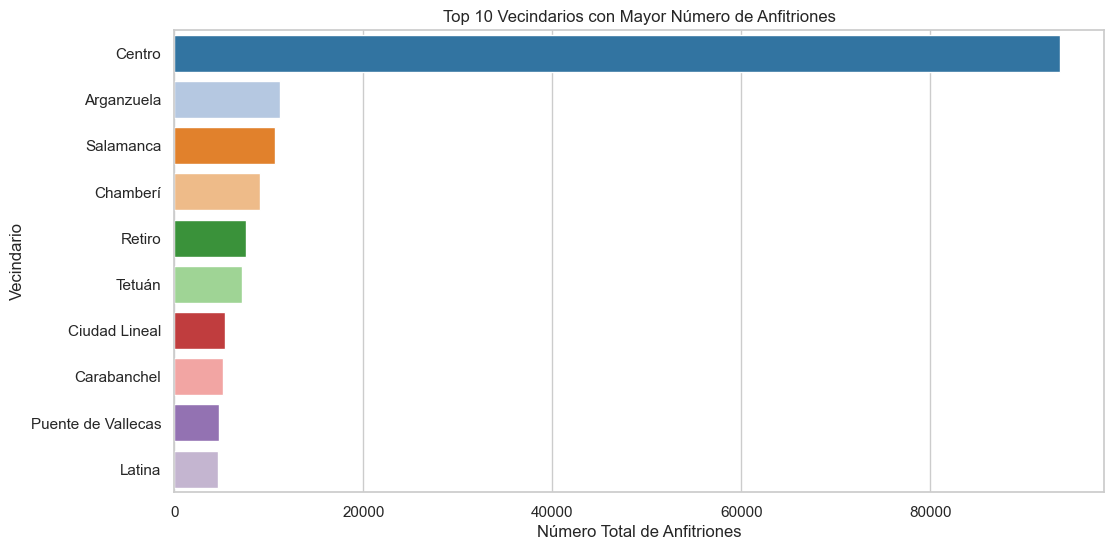

In [49]:
# Vecindarios con mayor número de anfitriones 
top_hosts = data.groupby('neighbourhood_group')['hosts_count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='tab20')
plt.title('Top 10 Vecindarios con Mayor Número de Anfitriones')
plt.xlabel('Número Total de Anfitriones')
plt.ylabel('Vecindario')
plt.show()

En la gráfica superior podemos ver los vecindarios con mayor anfitriones, y por tanto donde son los barrios donde se desarrolla mayor actividad inmobiliaria. Podemos ver que encabeza el barrio del Centro, donde hay como 8 veces más anfitriones que en el resto de vecindarios. 

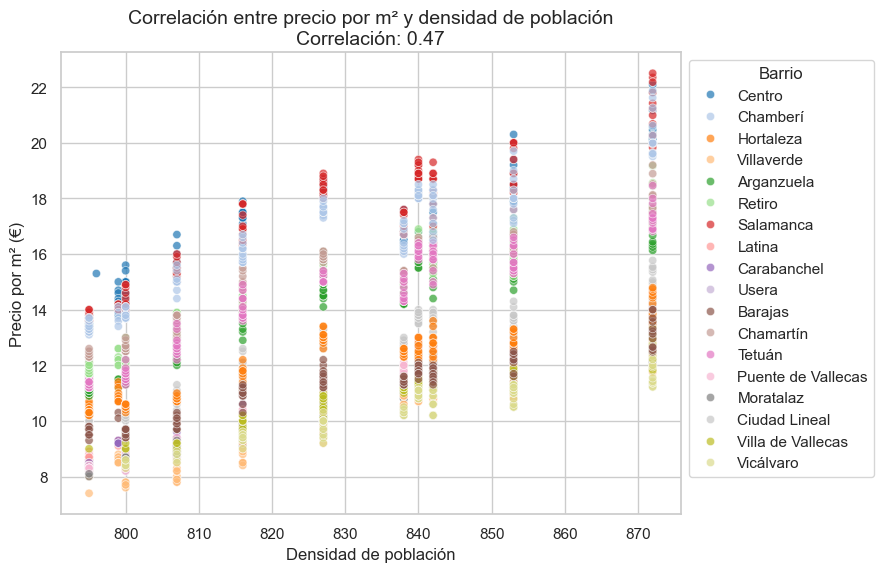

In [50]:
correlation = data["m2_price"].corr(data["population_density"])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="population_density", y="m2_price", hue="neighbourhood_group", palette='tab20', alpha=0.7)
plt.title(f"Correlación entre precio por m² y densidad de población\nCorrelación: {correlation:.2f}", fontsize=14)
plt.xlabel("Densidad de población")
plt.ylabel("Precio por m² (€)")
#plt.legend(title="Barrio")
plt.legend(title='Barrio', bbox_to_anchor=(1, 1))
plt.show()

In [28]:
data['month'] = pd.to_datetime(data['date']).dt.month

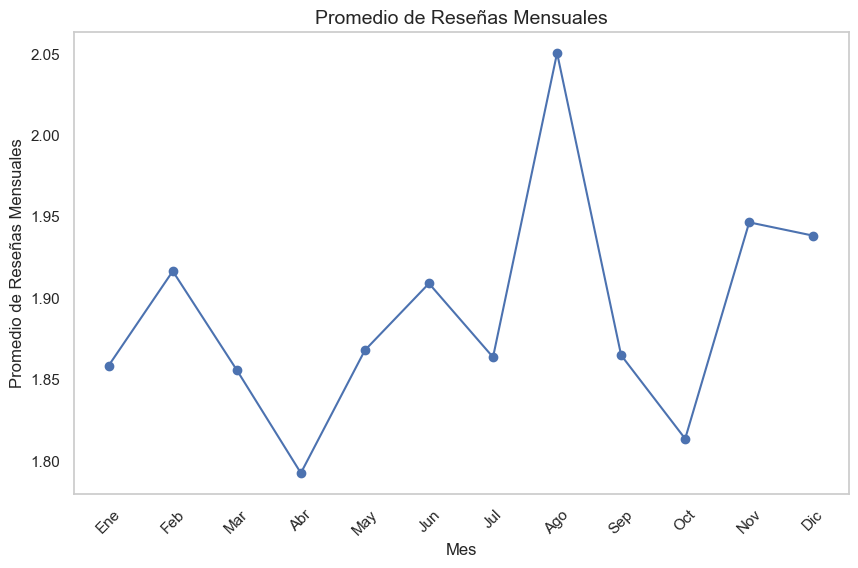

In [31]:
plt.figure(figsize=(10, 6))
monthly_reviews = data.groupby('month')['reviews_per_month'].mean()
monthly_reviews.plot(marker='o')
plt.title('Promedio de Reseñas Mensuales', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Promedio de Reseñas Mensuales')
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=45)
plt.grid()
plt.show()

En la gráfica podemos ver la media de reseñas mensuales. Destaca que en el mes de agosto es cuando más reseñas se hacen, por las vacaciones y el incremento de la actividad turística. Además, llama la atención como desde Abril hasta Junio hay un crecimiento, pero luego en Julio disminuyen, esto puede ser porque en Julio es cuando la gente menos viaja a Madrid si el hecho de que haya menos reseñas.

En Abril y Octubre es cuando menos reseñas se realizan, esto puede deberse a una menor actividad turística en estos meses.

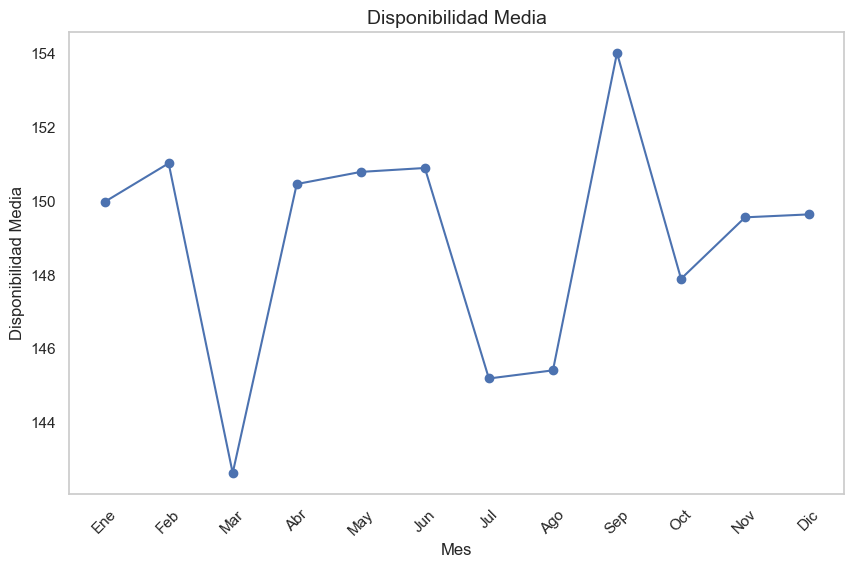

In [51]:
plt.figure(figsize=(10, 6))
monthly_availability = data.groupby('month')['availability_365'].mean()
monthly_availability.plot(marker='o')
plt.title('Disponibilidad Media', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Disponibilidad Media')
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=45)
plt.grid()
plt.show()

Podemos ver que hay dos caídas en la disponibilidad anual en marzo y en octubre. Además, la disponibilidad anual más alta se da en septiembre, lo que podría indicar un aumento de la oferta después de periodos de mayor demanda como en verano.

De enero a febrero, y en los meses cercanos al verano la disponibilidad promedio se mantiene más estable.

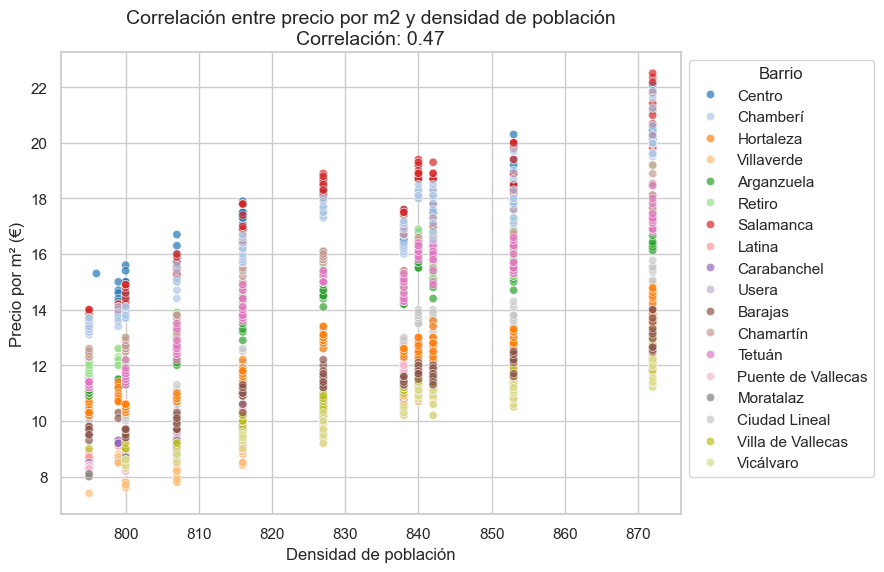

In [39]:
correlation = data["m2_price"].corr(data["population_density"])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="population_density", y="m2_price", hue="neighbourhood_group", palette='tab20', alpha=0.7)
plt.title(f"Correlación entre precio por m2 y densidad de población\nCorrelación: {correlation:.2f}", fontsize=14)
plt.xlabel("Densidad de población")
plt.ylabel("Precio por m² (€)")
#plt.legend(title="Barrio")
plt.legend(title='Barrio', bbox_to_anchor=(1, 1))
plt.show()

Existe una correlación positiva moderada de 0.47 entre el precio por metro cuadrado y la densidad de población.

Además, podemos ver como a medida que la densidad de población aumenta, los precios tienden a incrementarse.

Sin embargo, se aprecia cierta dispersión que indica que no es una relación estrictamente lineal. Esto se explica con que otros factores también pueden influir en el precio, como la ubicación o la demanda específica en ciertos vecindarios.

In [44]:
data.columns

Index(['neighbourhood_group', 'date', 'm2_price', 'inflation', 'HICP',
       'population_density', 'listings_count', 'minimum_nights', 'nigth_price',
       'availability_365', 'listing_reviews', 'number_of_reviews',
       'reviews_per_month', 'hosts_count', 'Private_room', 'Entire_home',
       'Hotel_room', 'Shared_room', 'year', 'month'],
      dtype='object')

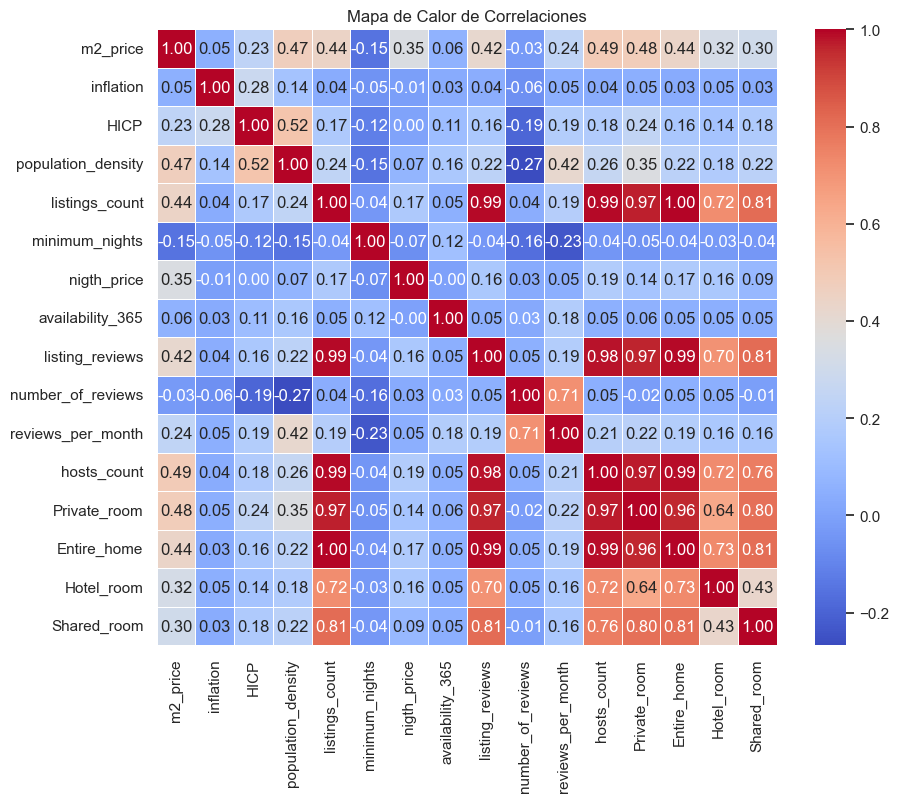

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['m2_price', 'inflation', 'HICP',
       'population_density', 'listings_count', 'minimum_nights', 'nigth_price',
       'availability_365', 'listing_reviews', 'number_of_reviews',
       'reviews_per_month', 'hosts_count', 'Private_room', 'Entire_home',
       'Hotel_room', 'Shared_room']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

- La densidad de población, los anfitriones activos, y las habitaciones privadas tiene la correlación más alta con el precio por metro cuadrado lo que indica que los vecindarios con mayor densidad, mayor número de anfitriones y mayor número de habitaciones privadas tienden a tener precios más altos.
- Otros factores, como la inflación y la disponibilidad anual, muestran sorprendentemente correlaciones muy bajas lo que sugiere que no influyen en la determinación del precio.
- La correlación entre el precio por noche y el precio por metro cuadrado es de 0.35, lo que indica que hay cierta correlación positiva, y si sube el precio por metro cuadrado, sube el precio por noche.

### 2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)

In [46]:
numeric_data = data.drop(columns=["date", "neighbourhood_group"], errors="ignore").apply(pd.to_numeric, errors="coerce")

predictors = ['inflation', 'HICP', 'population_density', 'listings_count',
              'minimum_nights', 'nigth_price', 'availability_365',
              'listing_reviews', 'number_of_reviews', 'reviews_per_month',
              'hosts_count', 'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']

# Agrupamos por fecha y agregamos solo las columnas numéricas
aggregated_data_cleaned = numeric_data.groupby(data['date']).mean().reset_index()

X = aggregated_data_cleaned[predictors]
y = aggregated_data_cleaned['m2_price']

model = LinearRegression()
model.fit(X, y)

coefficients = pd.DataFrame({
    'Predictor': predictors,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Predictor,Coefficient
14,Shared_room,0.201713
11,Private_room,0.104372
2,population_density,0.103751
1,HICP,0.056417
12,Entire_home,0.035937
8,number_of_reviews,0.019635
5,nigth_price,0.016335
6,availability_365,0.006178
7,listing_reviews,-0.002260
10,hosts_count,-0.018891


In [48]:
y_pred = model.predict(X)

# Calcular el R^2 score
r2 = r2_score(y, y_pred)
r2

0.8256222961289367

Los coeficientes del modelo de regresión lineal muestras la influencia de cada variable numérica en el precio por metro cuadrado. 

Vemos que las 3 variables con un mayor coeficiente positivo son:
- Shared_room (+0.2017), Private_room (+0.1044) y population_density (+0.1038) que aumentan ligeramente el precio promedio.

Por otro lado, las 3 variables con mayor coeficiente negativo son:
- reviews_per_month (-2.2774), Hotel_room (-0.3759) y minimum_nights (-0.0404), cuyo aumento producen una reducción significativa del precio.

### 3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)

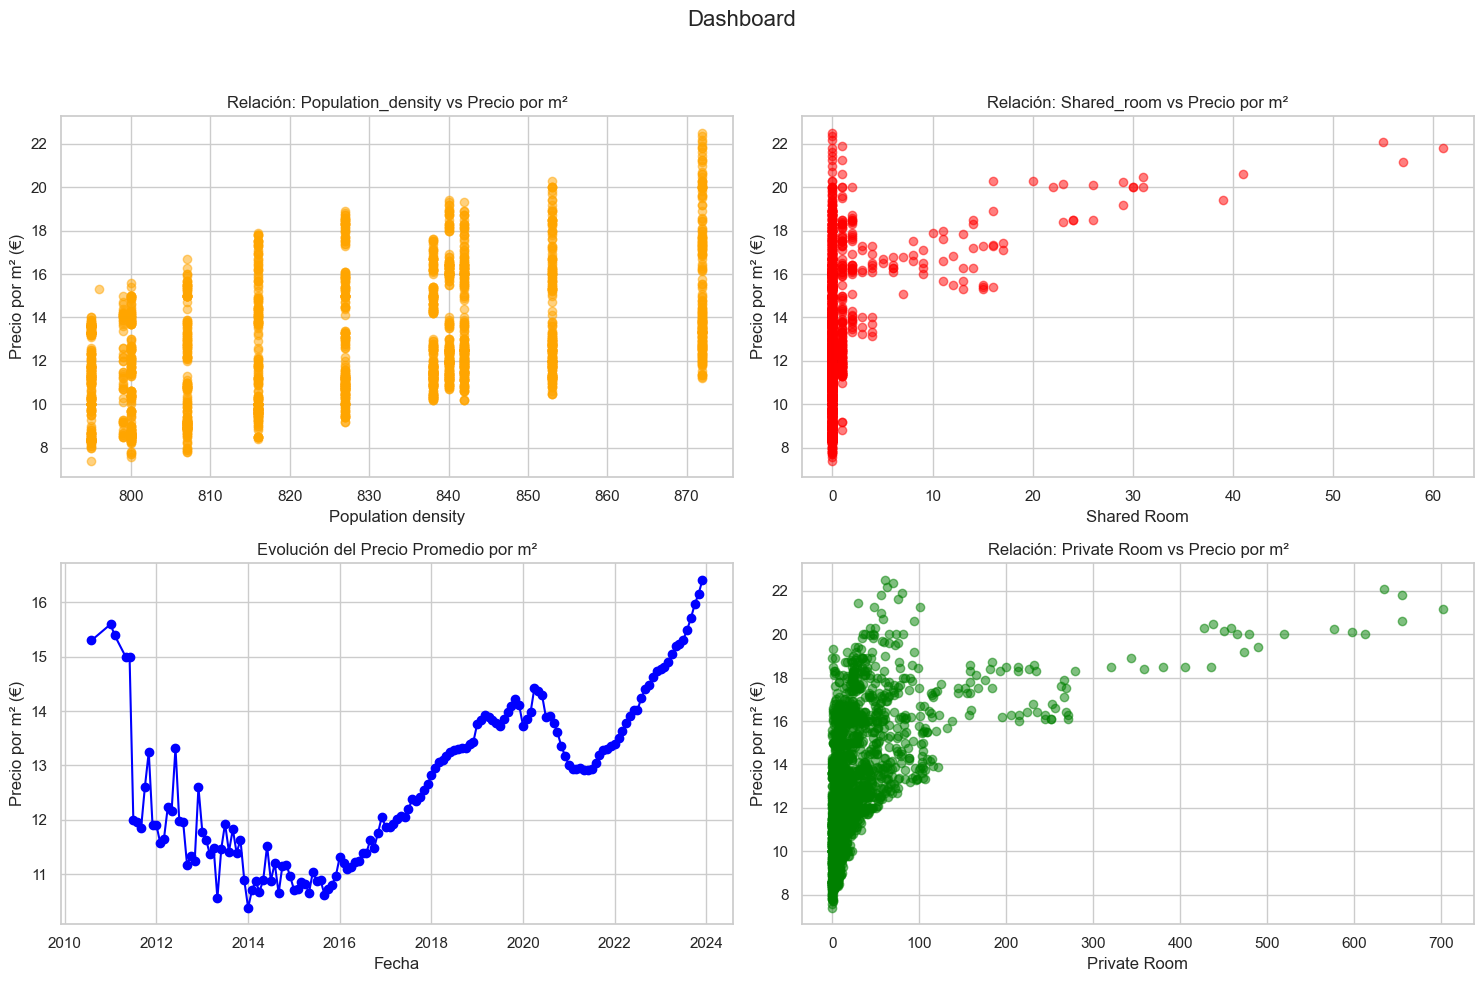

In [90]:
# Tamaño del dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Dashboard", fontsize=16)

axes[0, 0].scatter(data["population_density"], data["m2_price"], alpha=0.5, color="orange")
axes[0, 0].set_title("Relación: Population_density vs Precio por m²")
axes[0, 0].set_xlabel("Population density")
axes[0, 0].set_ylabel("Precio por m² (€)")
axes[0, 0].grid(True)

axes[0, 1].scatter(data["Shared_room"], data["m2_price"], alpha=0.5, color="red")
axes[0, 1].set_title("Relación: Shared_room vs Precio por m²")
axes[0, 1].set_xlabel("Shared Room")
axes[0, 1].set_ylabel("Precio por m² (€)")
axes[0, 1].grid(True)

price_trend = data.groupby("date")["m2_price"].mean()
axes[1, 0].plot(price_trend, color="blue", marker="o")
axes[1, 0].set_title("Evolución del Precio Promedio por m²")
axes[1, 0].set_xlabel("Fecha")
axes[1, 0].set_ylabel("Precio por m² (€)")
axes[1, 0].grid(True)

axes[1, 1].scatter(data["Private_room"], data["m2_price"], alpha=0.5, color="green")
axes[1, 1].set_title("Relación: Private Room vs Precio por m²")
axes[1, 1].set_xlabel("Private Room")
axes[1, 1].set_ylabel("Precio por m² (€)")
axes[1, 1].grid(True)

# Ajustar espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

### 4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)